In [2]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import PIL
import cv2

In [3]:
data_set_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
dataset_dir=tensorflow.keras.utils.get_file(fname="flower_photos", origin=data_set_url, untar=True, cache_dir=".")

228813984/228813984 [==============================] - 11s 0us/step


In [5]:
import pathlib

In [6]:
data_dir=pathlib.Path(dataset_dir)

In [7]:
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob("*/*.*"))

[PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/2973256732_1926295f35.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/roses/9338237628_4d2547608c.jpg'),
 PosixPath('datasets/flower_photos/roses/5497730366_44d758d8f5.jpg'),
 PosixPath('datasets/flower_photos/roses/3971662839_5cb2963b20_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/22325299158_6e32e599f8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 Pos

In [9]:
total_iamges_count=len(list(data_dir.glob("*/*.*")))

In [10]:
total_iamges_count

3670

In [11]:
roses=list(data_dir.glob("roses/*.*"))

In [12]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg')]

In [13]:
import PIL

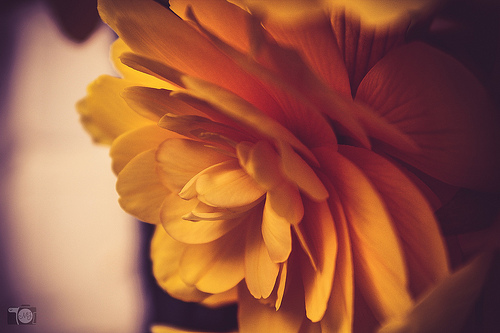

In [14]:
PIL.Image.open(roses[2])

In [15]:
tulips=list(data_dir.glob("tulips/*.*"))

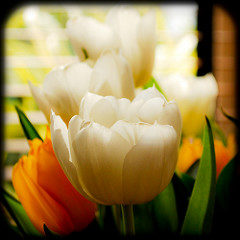

In [16]:
PIL.Image.open(tulips[0])

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
flowers_images_dict["roses"][0]

PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')

In [20]:
image_array=cv2.imread(str(flowers_images_dict["roses"][0]))

array([[[ 40,  77,  97],
        [ 37,  74,  94],
        [ 33,  70,  90],
        ...,
        [ 27,  63,  73],
        [ 28,  67,  76],
        [ 38,  81,  90]],

       [[ 46,  86, 105],
        [ 44,  84, 103],
        [ 40,  80,  99],
        ...,
        [ 39,  74,  87],
        [ 37,  75,  87],
        [ 44,  86,  99]],

       [[ 41,  84, 103],
        [ 41,  84, 103],
        [ 38,  81, 100],
        ...,
        [ 45,  80,  94],
        [ 40,  79,  93],
        [ 50,  91, 106]],

       ...,

       [[111, 119, 108],
        [117, 126, 113],
        [121, 130, 117],
        ...,
        [ 64,  82,  83],
        [ 66,  84,  85],
        [ 68,  86,  87]],

       [[125, 133, 122],
        [120, 128, 117],
        [116, 124, 113],
        ...,
        [ 60,  79,  76],
        [ 62,  81,  78],
        [ 62,  83,  80]],

       [[113, 121, 110],
        [115, 123, 112],
        [120, 128, 118],
        ...,
        [ 57,  78,  70],
        [ 58,  79,  71],
        [ 57,  80,  72]]], dtype=uint8)
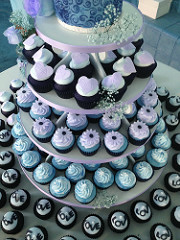

In [21]:
image_array

In [22]:
image_array.shape

(240, 180, 3)

In [23]:
cv2.resize(image_array,(180,180)).shape

(180, 180, 3)

In [24]:
x,y=[],[]
for flower,path in flowers_images_dict.items():
  print(flower,len(path))

roses 641
daisy 633
dandelion 898
sunflowers 699
tulips 799


In [25]:
x,y=[],[]
for flower_name,path in flowers_images_dict.items():
  for image_path in path:
    img=cv2.imread(str(image_path))
    resize_img=cv2.resize(img,(180,180))
    x.append(resize_img)
    y.append(flowers_labels_dict[flower_name])

In [26]:
y[:5]

[0, 0, 0, 0, 0]

In [27]:
x=np.array(x)
y=np.array(y)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [30]:
X_train_Scaled=X_train/255
X_test_Scaled=X_test/255

In [31]:
X_train_Scaled[0]

array([[[0.89803922, 0.67843137, 0.4       ],
        [0.89803922, 0.67058824, 0.40784314],
        [0.89803922, 0.6745098 , 0.40392157],
        ...,
        [0.83529412, 0.45490196, 0.1254902 ],
        [0.82745098, 0.45882353, 0.12941176],
        [0.82352941, 0.45882353, 0.11764706]],

       [[0.90196078, 0.68235294, 0.40392157],
        [0.89411765, 0.67058824, 0.40784314],
        [0.89803922, 0.6745098 , 0.41176471],
        ...,
        [0.83921569, 0.4627451 , 0.12156863],
        [0.83921569, 0.45882353, 0.12941176],
        [0.83921569, 0.45490196, 0.11764706]],

       [[0.89411765, 0.66666667, 0.40784314],
        [0.89803922, 0.67058824, 0.41176471],
        [0.90588235, 0.6745098 , 0.41176471],
        ...,
        [0.83529412, 0.4627451 , 0.11372549],
        [0.83529412, 0.45490196, 0.12941176],
        [0.83921569, 0.45490196, 0.12156863]],

       ...,

       [[0.84705882, 0.60392157, 0.31764706],
        [0.7372549 , 0.57647059, 0.41176471],
        [0.54117647, 0

In [32]:
X_train_Scaled[0].shape

(180, 180, 3)

In [33]:
X_train_Scaled.shape

(2752, 180, 180, 3)

In [36]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
model.fit(X_train_Scaled,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 8s 20ms/step - loss: 1.3569 - accuracy: 0.4084
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 1.0288 - accuracy: 0.5908
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.8690 - accuracy: 0.6628
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.6898 - accuracy: 0.7456
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.4819 - accuracy: 0.8267
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.2969 - accuracy: 0.9008
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1728 - accuracy: 0.9469
Epoch 8/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0880 - accuracy: 0.9753
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0411 - accuracy: 0.9891
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0618 - accuracy: 0.9855
Epoch 11/30
86/86 [=

In [39]:
model.evaluate(X_test_Scaled,y_test) #Model is overfitting (Low Bias and hogh variance)

 5/29 [====>.........................] - ETA: 0s - loss: 2.2101 - accuracy: 0.6812

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 0s 12ms/step - loss: 2.3570 - accuracy: 0.6841


[2.356961250305176, 0.6840958595275879]

In [44]:
y_pred=model.predict(X_test_Scaled)

29/29 [==============================] - 0s 10ms/step


In [45]:
y_pred[:5]

array([[9.9999344e-01, 1.6435602e-14, 2.3673342e-04, 5.3023024e-07,
        9.9998069e-01],
       [9.5021579e-10, 3.2460187e-02, 3.8871113e-02, 9.9931943e-01,
        8.1244141e-01],
       [1.1412976e-03, 2.7414313e-01, 9.9455208e-01, 2.4741821e-04,
        9.9734229e-01],
       [9.9192280e-01, 1.0000000e+00, 5.2254214e-05, 1.6372764e-02,
        2.4555484e-04],
       [6.6174775e-01, 1.5426138e-01, 8.0711785e-04, 9.9540931e-01,
        1.0847261e-02]], dtype=float32)

In [46]:
y_pred_max_Score=[np.argmax(i) for i in y_pred]

In [47]:
y_pred_max_Score[:5]

[0, 3, 4, 1, 3]

In [48]:
y_test[:5]

array([0, 3, 4, 1, 1])

# Model using Data augmentation to address overfitting

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


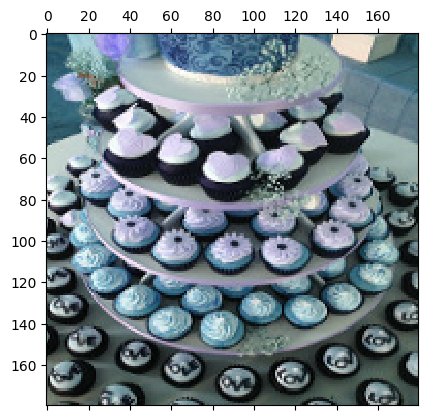

In [52]:
plt.matshow(x[0])

In [57]:
data_augmentation=keras.models.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.5)
])

In [58]:
data_augmentation(x)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[181.55641 , 204.55641 , 200.89761 ],
        [174.34245 , 197.34245 , 194.94255 ],
        [161.60098 , 185.55905 , 186.08551 ],
        ...,
        [ 86.43485 , 101.47079 , 105.468605],
        [110.407745, 129.16286 , 132.97685 ],
        [104.24168 , 125.97436 , 130.34613 ]],

       [[172.82733 , 195.82733 , 193.93246 ],
        [162.80763 , 185.80763 , 186.44699 ],
        [148.35144 , 171.84192 , 176.37128 ],
        ...,
        [ 89.40247 , 105.292625, 110.4564  ],
        [108.982796, 129.04561 , 133.57207 ],
        [104.34716 , 128.15276 , 132.47179 ]],

       [[157.18417 , 181.29431 , 182.27805 ],
        [144.67043 , 169.09229 , 172.6387  ],
        [131.47815 , 155.85364 , 163.00671 ],
        ...,
        [ 85.50062 , 101.31913 , 107.22212 ],
        [104.63695 , 124.89974 , 129.52145 ],
        [104.3374  , 128.6406  , 132.28964 ]],

       ...,

       [[111.552246, 153.14737 , 169.38802 ],
        [104.

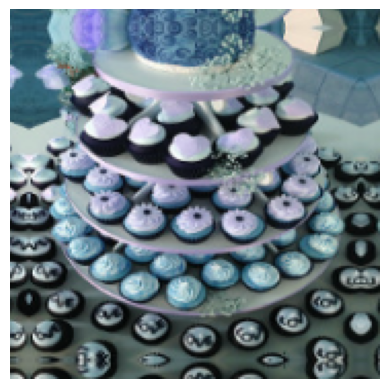

In [65]:
plt.axis("off")
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [68]:
data_augumentation=keras.models.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.5),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomZoom(0.5)
])

In [75]:
model=keras.models.Sequential([
    data_augumentation,
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(180,180,3)),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")

])

model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
model.fit(X_train_Scaled,y_train,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 7s 27ms/step - loss: 1.3140 - accuracy: 0.4422
Epoch 2/30
86/86 [==============================] - 2s 26ms/step - loss: 1.1115 - accuracy: 0.5469
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 1.0656 - accuracy: 0.5894
Epoch 4/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9832 - accuracy: 0.6206
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8988 - accuracy: 0.6523
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.8808 - accuracy: 0.6668
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8428 - accuracy: 0.6755
Epoch 8/30
86/86 [==============================] - 2s 26ms/step - loss: 0.8257 - accuracy: 0.6806
Epoch 9/30
86/86 [==============================] - 2s 26ms/step - loss: 0.7716 - accuracy: 0.7068
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.7530 - accuracy: 0.7111
Epoch 11/30
86/86 [=

In [78]:
model.evaluate(X_test_Scaled,y_test) #Accuracy with test data increased from 60 to 75%

 6/29 [=====>........................] - ETA: 0s - loss: 0.7725 - accuracy: 0.7552

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


29/29 [==============================] - 1s 26ms/step - loss: 0.8567 - accuracy: 0.7484


[0.8566625714302063, 0.7483659982681274]